## 1 Tipos de fronteras en clasificación

In [1]:
#Bloque para importar las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#==========================================================
#Definición de los 2 conjuntos de datos a utilizar
#==========================================================
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)
#==========================================================

Cantidad de elementos de la primera clase (Roja): 520
Cantidad de elementos de la segunda clase (Azul): 480


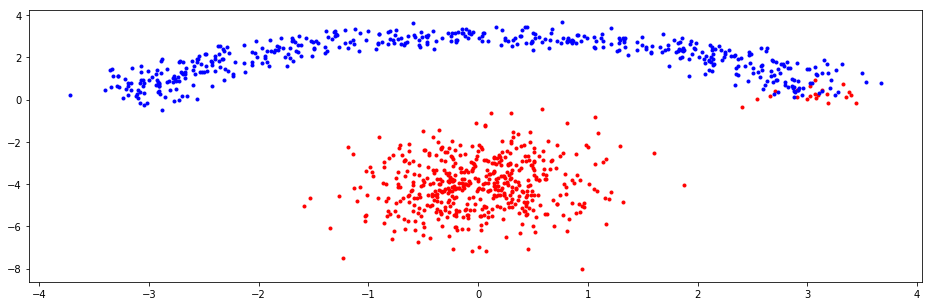

In [3]:
#Ejercicio A
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n) 
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)
#Y es un vector que contiene a que clase pertenece cada medición

print("Cantidad de elementos de la primera clase (Roja):",len(y1))
print("Cantidad de elementos de la segunda clase (Azul):",len(y2))

plt.figure(figsize = (16, 5))
plt.plot(X[:,0][:len(y1)+1], X[:,1][:len(y1)+1] ,'.r')
plt.plot(X[:,0][len(y1)+1:], X[:,1][len(y1)+1:] ,'.b')
plt.show()

<p style="font-size: 18px; line-height: 135%;}">

El primer conjunto tendrá 500+n elementos, mientras que el segundo conjunto tendrá 500-n elementos. Para este caso en particular el conjunto rojo tendrá 520 elementos, mientras que el azul tendrá 480 elementos.

</p>